<a href="https://colab.research.google.com/github/zusoomro/545FinalProject/blob/master/545_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modeling - PCA and Regression


## Setup

In [0]:
import numpy as np
import pandas as pd
import matplotlib

import gc
import time
import warnings

import nltk

from wordcloud import WordCloud
import matplotlib.pyplot as plt

from collections import Counter

import scipy

In [3]:
from google.colab import drive
drive.mount('/content/drive')

drive_data_path = "/content/drive/My Drive/CIS 545/Final Project/X.npz"

with open(drive_data_path, 'r') as f:
  X = scipy.sparse.load_npz(drive_data_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
X

<2188680x908 sparse matrix of type '<class 'numpy.float64'>'
	with 33005494 stored elements in COOrdinate format>

In [0]:
y_path = "/content/drive/My Drive/CIS 545/Final Project/y"

with open(y_path, 'rb') as f:
  y = pd.read_pickle(f)

## PCA

In [0]:
from sklearn.preprocessing import StandardScaler

# Standardizing the features based on unit variance
X = StandardScaler(with_mean=False).fit_transform(X)

In [7]:
# Get the shape of the data
X

<2188680x908 sparse matrix of type '<class 'numpy.float64'>'
	with 33005494 stored elements in Compressed Sparse Row format>

IncrementalPCA is a scikit learn module which works incrementally, allowing the dataset to be processed in Colab. Because I'd rather keep the data sparse instead of blowing it up to a dense representation, I'll use IncrementalPCA here instead of PCA (as it accepts sparse input)

In [0]:
# from sklearn.decomposition import TruncatedSVD

# pca = TruncatedSVD(n_components=400)
# X2 = pca.fit_transform(X)

In [0]:
from sklearn.decomposition import IncrementalPCA

pca = IncrementalPCA(n_components=600, batch_size=10000)

In [11]:
pca.fit(X)

IncrementalPCA(batch_size=10000, copy=True, n_components=600, whiten=False)

In [0]:
X2 = pca.transform(X)

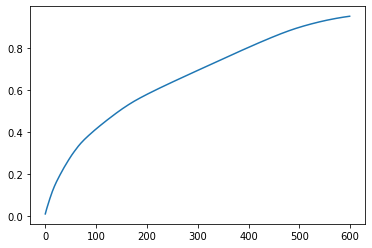

In [13]:
# See how much is contributed by the first few terms
pc_vs_variance = np.cumsum(pca.explained_variance_ratio_)

pc_vs_variance
plt.plot(pc_vs_variance)

Looks like most of the variance is explained by the 600'th component, so we will choose to use that many.